# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [ ]:
%pip install tensorflow
%pip install tensorflow-io[tensorflow]
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1.2 Load Dependencies

In [ ]:
import os # easier to navigate through the data directory
import tensorflow as tf # help to build DL model
from matplotlib import pyplot as plt # easier to visualize the waveform
import tensorflow_io as tfio # easier to process out audio clips

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [ ]:
CAPUCHIN_FILE = "/kaggle/input/deepaudioclassifier-data/data/Parsed_Capuchinbird_Clips/XC114131-0.wav"
NOT_CAPUCHIN_FILE = "/kaggle/input/deepaudioclassifier-data/data/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav"

#to run locally on any OS we can use - os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')

## 2.2 Build Dataloading Function

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    # returns tensor of dtype "string", with the file contents
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    # we get mono channel, waveform data and sample rate
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removing the last axis, which is typically used for channels in audio data
    wav = tf.squeeze(wav, axis=-1)
    # Having it in the format that can be used for re-sampling
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 48000Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

## 2.3 Plot Wave

In [ ]:
%pip install --upgrade tensorflow
%pip install --upgrade tensorflow-io

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

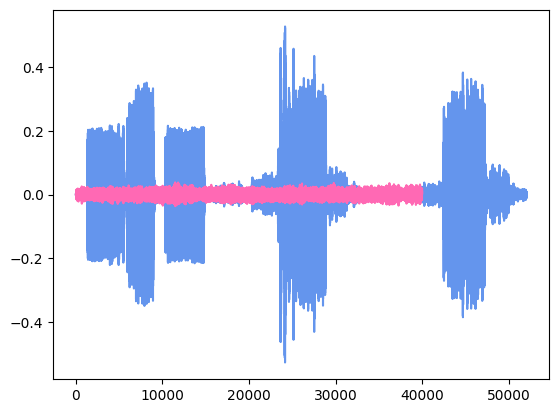

In [ ]:
# wav contains waveform data
plt.plot(nwave, color='cornflowerblue')
plt.plot(wave, color='hotpink')
plt.show()

Now we got audio in the format we can work with now - waveform data.

We need to convert raw audio waveforms that we had by loading it in using the tensorflow decode method into a spectrogram using the short time fourier transform before modeling.

Basically, we will be converting audio wave effectively into an image representation, through which later on we will be able to use image classification techniques to count the number of capuchin calls density.

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [ ]:
POS = '/kaggle/input/deepaudioclassifier-data/data/Parsed_Capuchinbird_Clips'
NEG = '/kaggle/input/deepaudioclassifier-data/data/Parsed_Not_Capuchinbird_Clips'

## 3.2 Create Tensorflow Datasets

In [ ]:
# gives us sets of files as strings inside of a tensorlfow data set format
# can be easily preprocessed and loaded
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [ ]:
pos.as_numpy_iterator().next()

b'/kaggle/input/deepaudioclassifier-data/data/Parsed_Capuchinbird_Clips/XC9221-0.wav'

## 3.3 Add labels and Combine Positive and Negative Samples

Preparing a dataset for a binary classification problem, where there are positive and negative samples.

In [ ]:
# Zip the positive samples with labels (1 for positive)
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
# Zip the negative samples with labels (0 for negative)
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
# Combine positive and negative datasets
data = positives.concatenate(negatives)

In [ ]:
positives.as_numpy_iterator().next()

(b'/kaggle/input/deepaudioclassifier-data/data/Parsed_Capuchinbird_Clips/XC227468-1.wav',
 1.0)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

Useful for understanding the distribution of audio lengths.

In [ ]:
lengths = []
Dir_Capuchin = '/kaggle/input/deepaudioclassifier-data/data/Parsed_Capuchinbird_Clips'
for file in os.listdir(Dir_Capuchin):
    tensor_wave = load_wav_16k_mono(os.path.join(Dir_Capuchin,file))
    lengths.append(len(tensor_wave))

The lengths list contains the lengths (number of elements) of the waveform tensors corresponding to each processed WAV file from the Capuchin Calls.

In the context of audio processing, a waveform tensor is a representation of an audio signal in a numerical format that can be easily processed by machine learning models. A waveform is a time-domain representation of an audio signal, where the amplitude of the signal is sampled at regular intervals over time. Each element of the waveform tensor corresponds to the amplitude of the audio signal at a specific time point.

In [ ]:
lengths

[64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 56000,
 55999,
 72000,
 48000,
 56000,
 56000,
 40000,
 40000,
 56000,
 56000,
 64000,
 32000,
 56000,
 64000,
 40000,
 48000,
 64000,
 56000,
 40000,
 64000,
 48000,
 56000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 72000,
 48000,
 48000,
 64000,
 39999,
 64000,
 56000,
 64000,
 56000,
 40000,
 64000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 72000,
 40000,
 48000,
 40000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 40000,
 48000,
 64000,
 56000,
 40000,
 56000,
 32000,
 56000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 56000,
 48000,
 48000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 72000,
 56000,
 56000,
 48000,
 40000,
 48000,
 64000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,


## 4.2 Calculate Mean, Min and Max

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
# 16k cycles per sec = 16000 Hz & avg_cycles in a audio sample = 54156
avg_capuchinCall = 54156/16000 #(~ 3.3 s)
avg_capuchinCall

3.38475

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

Stats -

1.   Average Call = 54156/16000 = 3.38 s
2.   Longest Call = 80000/16000 = 5 s
3.   Shortest Call = 32000/16000 = 2 s

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [ ]:
def preprocess(file_path, label):
    # Load the WAV file and obtain the waveform tensor
    wav = load_wav_16k_mono(file_path)

    # Trim or zero-pad the waveform tensor to a fixed length of 48000 samples
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)

    # Compute the short-time Fourier transform (STFT) of the waveform
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)

    # Compute the absolute values of the STFT to get the spectrogram
    spectrogram = tf.abs(spectrogram)

    # Add an extra dimension to the spectrogram to represent the channel
    # Required to match the input shape expected by neural network models
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    # shape = (1491,257,1) ; 1 is added; a grayscaled image as we have a single channel

    # Return the spectrogram along with the label
    return spectrogram, label

## 5.2 Test Out the Function and Visualize the Spectrogram

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
# get next example out of our data pipeline

In [ ]:
spectrogram, label = preprocess(filepath, label)

In [ ]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[3.6473980e+00],
        [3.1966515e+00],
        [2.0568476e+00],
        ...,
        [1.4078766e-04],
        [4.4961485e-05],
        [3.1113625e-05]],

       [[2.7477493e+00],
        [2.6182773e+00],
        [1.9182246e+00],
        ...,
        [1.4422608e-04],
        [8.1156759e-05],
        [1.7642975e-05]],

       [[1.5309542e+00],
        [1.9188148e+00],
        [1.7523293e+00],
        ...,
        [1.7662891e-04],
        [7.7558652e-05],
        [2.9683113e-05]],

       ...,

       [[4.9645013e-01],
        [1.0854688e+00],
        [1.2337719e+00],
        ...,
        [1.7895146e-04],
        [5.4349322e-05],
        [3.5688281e-05]],

       [[2.3974851e-01],
        [8.8648140e-01],
        [1.1395400e+00],
        ...,
        [1.4370086e-04],
        [2.1490641e-05],
        [4.2416155e-05]],

       [[6.6386735e-01],
        [8.6962724e-01],
        [1.0623900e+00],
        ...,
        [1.4255282

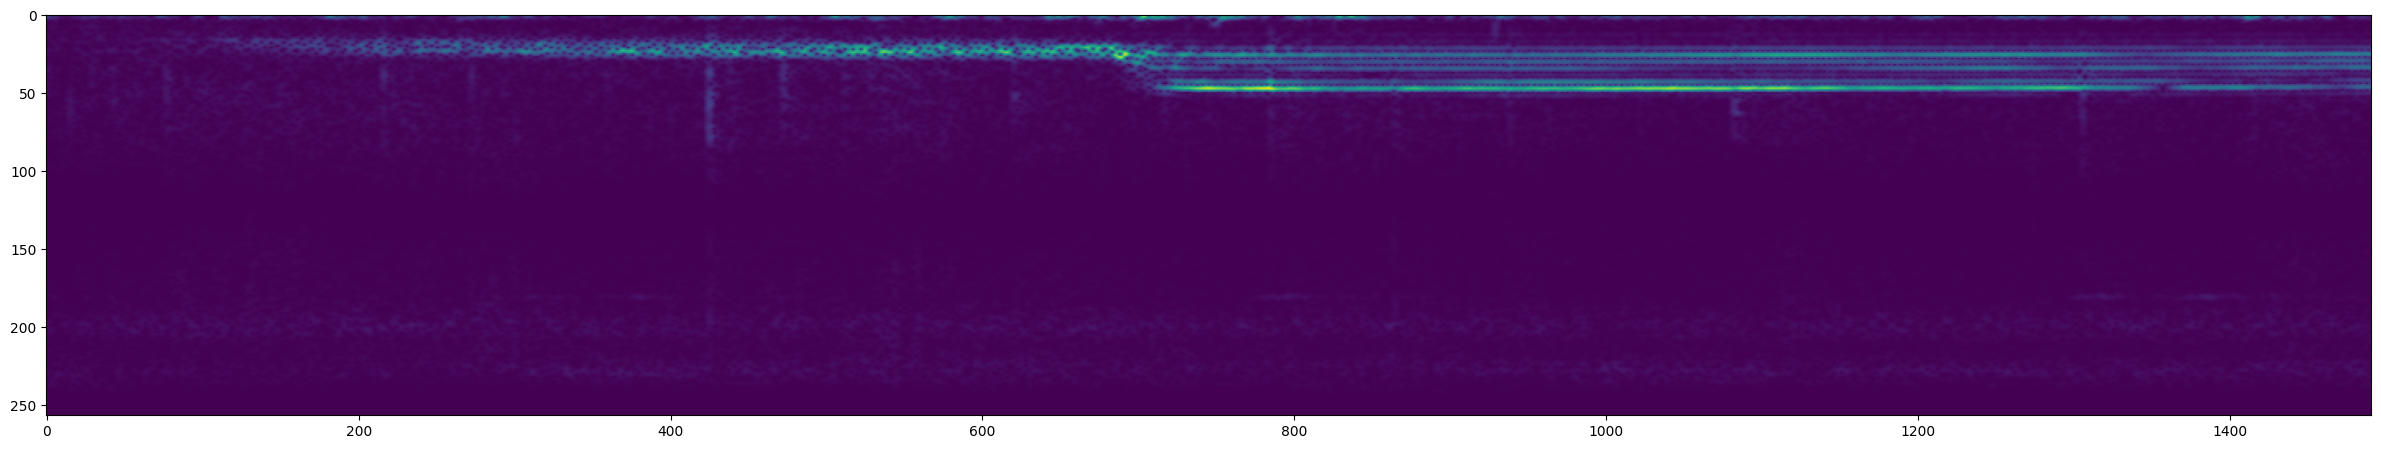

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

Visualizing the Capuchin Bird Calls; we can observe that it slowly rises up.

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

We will now build a Deep Learning Model to detect single Capuchin Bird Calls.

To detect the call density -
Once we got this model trained we will slice up the longer clips of the forest into shorter windows, we can then use that model to classify if there's a capuchin bird heard in that specific clip. Then we can aggregate the results and calculate how many calls were heard exactly.

In [ ]:
data = data.map(preprocess)
data = data.cache()
# ensures reduced chances of unnecessary overfitting; mixed samples
data = data.shuffle(buffer_size=1000)
# Train on 16 samples at a time
data = data.batch(16)
# Prefetches 8 samples; eliminates any CPU bottleneck
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions

In [ ]:
len(data)*.7

36.4

In [ ]:
train = data.take(36)
test = data.skip(36).take(16)

## 6.3 Test One Batch

In [ ]:
# Grabbing the next sample from training dataset
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape
# this specfic shape will be passed to DL model - (16, 1491, 257, 1)

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten
from keras.models import Sequential

## 7.2 Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770482865 (2.87 GB)
Trainable params: 770482865 (2.87 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 519s 14s/step - loss: 8.4648 - recall: 0.8125 - precision: 0.8176 - val_loss: 0.1315 - val_recall: 0.8696 - val_precision: 1.0000
Epoch 2/4
36/36 [==============================] - 492s 14s/step - loss: 0.0676 - recall: 0.8774 - precision: 1.0000 - val_loss: 0.0194 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 499s 14s/step - loss: 0.0194 - recall: 0.9874 - precision: 0.9937 - val_loss: 0.0014 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 477s 13s/step - loss: 0.0068 - recall: 0.9861 - precision: 1.0000 - val_loss: 0.0027 - val_recall: 1.0000 - val_precision: 1.0000


The fit method then returns a history object (hist in this case). This object contains information about the training process, such as training loss, validation loss, and any specified metrics. It allows you to analyze and visualize the training progress.

Loss, Precision, and Recall Plots -

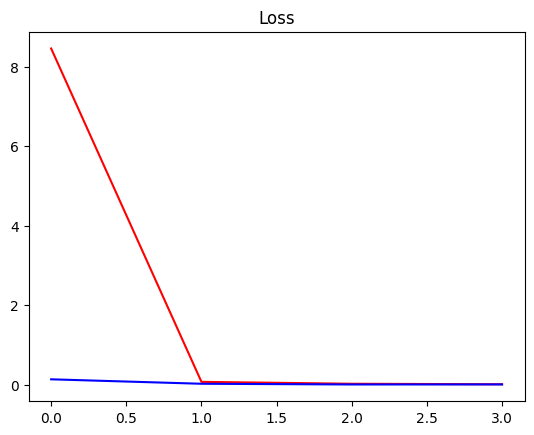

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

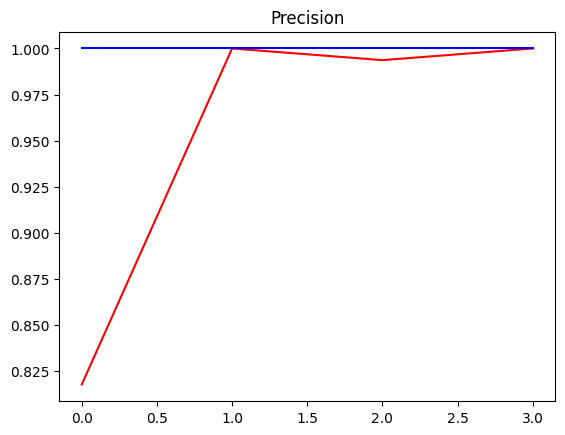

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

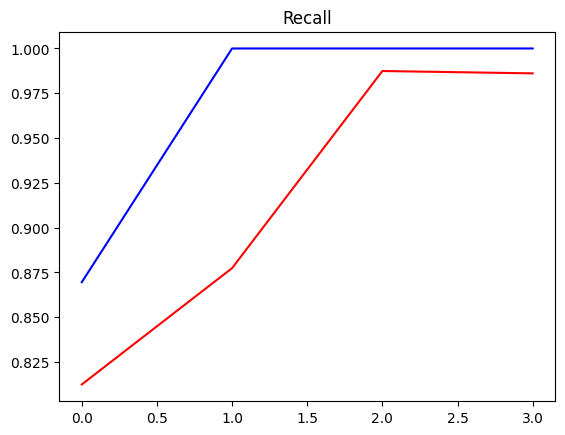

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

To visualize the training progress and performance of a model -

In [ ]:
hist.history

{'loss': [8.464770317077637,
  0.06759432703256607,
  0.019436471164226532,
  0.006758300121873617],
 'recall': [0.8125,
  0.8774193525314331,
  0.9874213933944702,
  0.9861111044883728],
 'precision': [0.8176100850105286, 1.0, 0.9936708807945251, 1.0],
 'val_loss': [0.1315089464187622,
  0.01938648521900177,
  0.0013938796473667026,
  0.002697698539122939],
 'val_recall': [0.8695651888847351, 1.0, 1.0, 1.0],
 'val_precision': [1.0, 1.0, 1.0, 1.0]}

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

Extracting a single batch (or element) from the test dataset, where X_test contains the input samples, and y_test contains the corresponding labels.

In [ ]:
y_test.shape

(16,)

In [ ]:
yhat = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


*yhat* will contain the raw output (logits) from the model. These logits represent the model's confidence scores for each input sample

In [ ]:
yhat

array([[0.0000000e+00],
       [4.9716247e-05],
       [4.3827528e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.5079168e-38],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.1884880e-11],
       [1.9910050e-17],
       [9.8751676e-01],
       [9.9964625e-01],
       [5.5256108e-04],
       [9.9999070e-01],
       [1.7499000e-23],
       [1.0000000e+00]], dtype=float32)

## 8.2 Convert Logits to Classes

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

Converts the raw logits into binary classes based on a threshold (0.5 in this case)

In [ ]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

Here, both y_test == yhat
i.e.
our model is working correctly.

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

Preparing audio data from MP3 files for further processing -

In [ ]:
def load_mp3_16k_mono(filename):
    # Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio.
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('/kaggle/input/deepaudioclassifier-data/data/Forest Recordings/recording_00.mp3')

 This process prepares a dataset of non-overlapping audio sequences from an MP3 file. Each sequence is of fixed length (48000 samples), and the dataset can be used for training a machine learning model to recognize patterns or features in the audio data -

In [ ]:
wav = load_mp3_16k_mono(mp3)
#loads the mp3 file to preprocess

In [ ]:
# Creating Time Series Dataset
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()
# Getting a Batch from the Dataset Iterator

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    # zero-padding ensures that all input sequences have the same length
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    # computes stft of padded audio sequence
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    # audio signal --> time frequency representation
    #  to focus on the magnitude of the signal we take absolute
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
# It applies the preprocess_mp3 function to each element in the dataset. The function preprocesses each audio sequence, computing the spectrogram as explained in the previous response.
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)
# creating time series dataset for the whole dataset

Uses the trained model (model) to predict the output for each batch in the audio_slices dataset.

And the it converts the predicted values into binary classes. For each predicted value, if it is greater than 0.99, it is assigned the class label 1; otherwise, it is assigned the class label 0.

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 6s 6s/step


*yhat* contains the final binary class predictions based on the model's output for the input audio sequences.

In [ ]:
yhat

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## 9.4 Group Consecutive Detections

The idea behind this code is to group consecutive predictions to identify contiguous segments where the model predicts the presence of a certain event (e.g., a call). The sum of these segments provides an overall count of calls in the entire dataset.

In [ ]:
from itertools import groupby

In [ ]:
# purpose is to group consecutive identical elements together. The result is a new list (yhat) where consecutive identical predictions are represented by a single instance of the prediction.
yhat = [key for key, group in groupby(yhat)]
# result is then converted to a NumPy array using .numpy(). This sum represents the total number of consecutive calls made by the model.
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

5

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

Loop over all forest recordings to make predictions and store them in results -

In [ ]:
results = {}
for file in os.listdir('/kaggle/input/deepaudioclassifier-data/data/Forest Recordings'):
    FILEPATH = os.path.join('/kaggle/input/deepaudioclassifier-data/data/Forest Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)

    results[file] = yhat

1/1 [==============================] - 5s 5s/step


In [ ]:
results

{'recording_76.mp3': array([[4.5268629e-03],
        [2.5374938e-08],
        [4.7603999e-03],
        [4.5770523e-03],
        [6.9158990e-03],
        [8.9248708e-03],
        [1.0786332e-02],
        [8.4433677e-03],
        [3.7934717e-03],
        [9.2995828e-03],
        [9.0697082e-03],
        [1.2604352e-02],
        [1.4700167e-02],
        [3.3779687e-03],
        [6.2532485e-03],
        [7.7982852e-03],
        [1.0332994e-02],
        [9.4518317e-03],
        [2.4410192e-02],
        [4.0254603e-05],
        [3.7429782e-05],
        [1.9940066e-05],
        [7.2086892e-05],
        [5.8825720e-14],
        [2.2816560e-15],
        [3.8164286e-27],
        [7.7390275e-15],
        [4.2289943e-13],
        [6.0460994e-12],
        [3.5398354e-11],
        [1.1938477e-22],
        [1.5084330e-12],
        [2.8640848e-06],
        [3.2828462e-12],
        [5.3915161e-10],
        [6.3245870e-14],
        [9.2564836e-12],
        [1.0174983e-12],
        [1.7991266e-11],
     

## 10.2 Convert Predictions into Classes

It iterates over the items in the results dictionary, where each item corresponds to a file and its associated logits (predicted values) from the model. For each file, it creates a list of binary class predictions (1 if the prediction is greater than 0.99, and 0 otherwise).

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_76.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_62.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_48.mp3': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_44.mp3': [0,
  0,
  0,
  

## 10.3 Group Consecutive Detections

Aggregates the binary class predictions to provide a count of the total number of events for each file. The use of groupby helps in identifying contiguous segments of the same prediction class in the list of binary predictions.

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_76.mp3': 0,
 'recording_62.mp3': 0,
 'recording_48.mp3': 4,
 'recording_44.mp3': 1,
 'recording_45.mp3': 3,
 'recording_06.mp3': 5,
 'recording_43.mp3': 5,
 'recording_68.mp3': 1,
 'recording_95.mp3': 5,
 'recording_17.mp3': 3,
 'recording_65.mp3': 5,
 'recording_74.mp3': 0,
 'recording_10.mp3': 5,
 'recording_49.mp3': 0,
 'recording_15.mp3': 2,
 'recording_37.mp3': 5,
 'recording_64.mp3': 3,
 'recording_39.mp3': 6,
 'recording_04.mp3': 4,
 'recording_28.mp3': 16,
 'recording_05.mp3': 0,
 'recording_80.mp3': 1,
 'recording_57.mp3': 4,
 'recording_12.mp3': 0,
 'recording_59.mp3': 5,
 'recording_67.mp3': 0,
 'recording_09.mp3': 0,
 'recording_79.mp3': 0,
 'recording_14.mp3': 0,
 'recording_63.mp3': 8,
 'recording_86.mp3': 5,
 'recording_47.mp3': 6,
 'recording_03.mp3': 0,
 'recording_33.mp3': 0,
 'recording_08.mp3': 18,
 'recording_51.mp3': 3,
 'recording_35.mp3': 0,
 'recording_81.mp3': 5,
 'recording_30.mp3': 3,
 'recording_88.mp3': 0,
 'recording_75.mp3': 1,
 'recording_46

# 11. Export Results

In [ ]:
import csv

Writes the results obtained from the postprocessed dictionary into a CSV file named 'results.csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])

In [ ]:
precision = [0.8176100850105286, 1.0, 0.9936708807945251, 1.0]
true_positives = [precision[i] * (precision[i] + (1 - precision[i])) for i in range(len(precision))]
true_negatives = [1.0 for _ in range(len(precision))]  # Assuming all true negatives

# Assuming binary classification, calculate accuracy for each epoch
accuracy = [(tp + tn) / 2.0 for tp, tn in zip(true_positives, true_negatives)]

# Print accuracy for each epoch
for epoch, acc in enumerate(accuracy, 1):
    print(f'Epoch {epoch} Accuracy: {acc:.4f}')


Epoch 1 Accuracy: 0.9088
Epoch 2 Accuracy: 1.0000
Epoch 3 Accuracy: 0.9968
Epoch 4 Accuracy: 1.0000


END.